# Introduction to Scikit Learn (Sklearn)

This notebook shows some of the most useful functions of scikit library.

### What we are going to cover
0. An end-to-end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end scikit learn workflow

### Get the data ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Reading the data
heart_disease = pd.read_csv('./../datasets/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)
X

# Create Y (labels)
Y = heart_disease['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [4]:
# 2. Choose the right model and hyperparameters
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
clf.fit(X_train, Y_train);

In [7]:
# make a prediction
y_preds = clf.predict(X_test)

In [8]:
y_preds

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [9]:
# Evaluate the model on the training data and the test data
clf.score(X_train, Y_train)

1.0

In [10]:
clf.score(X_test, Y_test)

0.8852459016393442

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [12]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [13]:
confusion_matrix(Y_test, y_preds)

array([[23,  5],
       [ 2, 31]])

In [14]:
accuracy_score(Y_test, y_preds)

0.8852459016393442

In [15]:
# 5. Improve a model
# Try different amount n estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 86.89%



In [16]:
clf = RandomForestClassifier(n_estimators=40).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.819672131147541

In [17]:
# 6. Save a model and load it 
import pickle 

pickle.dump(clf, open("random_frst_model1.pkl","wb"))

In [18]:
loaded_model = pickle.load(open("random_frst_model1.pkl","rb"))
loaded_model.score(X_test, Y_test)

0.819672131147541

In [19]:
import warnings
warnings.filterwarnings("ignore") # To remove the warnings from Jupyter notebook we can use this command
warnings.filterwarnings("default") # To set it back to the default value

## 1. Getting the data ready to be used with machine learning

**Three main things we have to do :**

    1. Split the data into features and labels (usually 'X' and 'y')    
    2. Filling (also called imputing) or disregarding missing values 
    3. Converting non-numerical values to numerical values (also called feature encoding)
    

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [22]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X=X_train, y=y_train)
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.8360655737704918

### 1.1 Make sure the data is all numerical

In [23]:
car_sales = pd.read_csv('./../datasets/car-sales-extended.csv')
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
car_sales['Make']

0       Honda
1         BMW
2       Honda
3      Toyota
4      Nissan
        ...  
995    Toyota
996    Nissan
997    Nissan
998     Honda
999    Toyota
Name: Make, Length: 1000, dtype: object

In [25]:
# Split the data into training and test data set 
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [26]:
# Train the model on un-prepared data
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# y_preds = clf.predict(X_test)
# accuracy_score(y_test, y_preds)

In [27]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [28]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features,)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
# Another method to hot encode our data
Dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
Dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [30]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the transformed X into ML model
np.random.seed(42)
# 1. Splitting the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [33]:
# Import car sales missing data
car_sales_missing = pd.read_csv('./../datasets/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X;

#### Option 1 : Fill missing Data with pandas

In [36]:
car_sales_missing["Make"].fillna('missing', inplace=True)
car_sales_missing["Colour"].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
len(car_sales_missing)

950

In [39]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')
Data_transformed = transformer.fit_transform(car_sales_missing)
Data_transformed

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing value using sklearn

In [40]:
car_sales_missing = pd.read_csv('../datasets/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# First we need to drop the rows which do not have label
car_sales_missing.dropna(subset=['Price'], inplace=True) # This drops the subset 'Price' which does not have value
car_sales_missing['Price'].isna().sum()

0

In [43]:
# Split into X & Y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [44]:
# Fill missing values in X
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills the missing values)
imputer = ColumnTransformer ([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)],
    remainder='passthrough')

# Transform the data 
filled_X =  pd.DataFrame(imputer.fit_transform(X))
filled_X

,0,1,2,3
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [45]:
cat_features=[0,1,2]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 cat_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(filled_X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
# Fitting the model with new data
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [47]:
len(filled_X)

950

* Process of filling missing values is called imputation
* Process of  turning non-numerical values into numerical values is called feature engineering


## 2. Choosing the right estimator / algorithm for your machine learning problem

Some things to note:
* Sklearn refers machine learning models/algorithms as estimators
* Classification Problem - predicting a category
    * Sometimes you will see `clf` (Short for classifier) used as a classification estimator
* Regression Problem - predicting a number

If you are working on a machine learning problem and looking to use sklearn and not sure what model you should use, refer to sklearn machine learning map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

### 2.1 Picking a machine learning model for a regression problem
Let's use california housing dataset

In [48]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [49]:
housing_df = pd.DataFrame(housing["data"], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
# housing_df = housing_df.drop('MedHouseVal', axis=1)

In [52]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# split the data into X and y

X = housing_df.drop('target', axis=1)
y = housing_df['target']

# splitting the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the model
model = RandomForestRegressor(n_estimators=120)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8067769508634096

### Random Forests
Random forests mitigate this problem well. A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.


In [54]:
# Importing the data
heart_disease = pd.read_csv('./../datasets/heart-disease.csv')
len(heart_disease)

303

Trying the SVM model as is given in the map

In [55]:
# Setting the random seed
np.random.seed(42)

# Preparing Data for X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Spliting the data in test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Importing the model 
from sklearn import svm

# Selecting a model
model = svm.SVC()

# Fitting the model
model.fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.7049180327868853

SVM didn't work...
Trying the K Nearest Neighbors model as further suggested by the map

In [56]:
# Setting the random seed 
np.random.seed(42)

# Preparing Data for X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Spliting the data in test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Importing the model 
from sklearn.neighbors import KNeighborsClassifier

# Selecting a model
model = KNeighborsClassifier()

# Fitting the model
model.fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.6885245901639344

K Nearest Neighbors didn't work too... Trying the Random forest classifier model

In [57]:
# Setting the random seed 
np.random.seed(42)

# Preparing Data for X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Spliting the data in test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Importing the model 
from sklearn.ensemble import RandomForestClassifier

# Selecting a model
model = RandomForestClassifier()

# Fitting the model
model.fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.8524590163934426

#### TidBit:

1. If you have structured Data use ensemble methods
2. If you have unstructured data use Deep learning or transfer learning


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data 

In [58]:
# Setting the random seed 
np.random.seed(42)

# Preparing Data for X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Spliting the data in test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Importing the model 
from sklearn.ensemble import RandomForestClassifier

# Selecting a model
model = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
model.fit(X_train, y_train)

# Evaluating the model (use the pattern model has learnt)
model.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using the machine learning models

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [59]:
# Use a trained model to make predictions
y_preds = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [60]:
# predict_proba returns probabilities of a classification label
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [61]:
# Let's predict on the same data...
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used with regression models

In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [63]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
# Setting random seed
np.random.seed(42)

# Splitting the data into X and y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# splitting the data into training and test Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Selecting a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()

# Fitting the model into data
model.fit(X_train, y_train)

# Predicting using the trained model 
y_preds = model.predict(X_test)

# Evaluating the model
r2_score(y_test, y_preds)

0.8066196804802649

## 4. Evaluating a machine learning model
Three ways to evaluate scikit-learn models/estimators:

1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model/estimator with `score` method

In [65]:
# Setting up random seed
np.random.seed(42)

# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Spliting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Selecting a model/estimator
model = RandomForestClassifier()

# Fitting the Estimator
model.fit(X_train, y_train)

# Evaluating the model/estimator
model.score(X_test, y_test)

0.8524590163934426

In [66]:
# Setting random seed
np.random.seed(42)

# Splitting the data into X and y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# splitting the data into training and test Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Selecting a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=100)

# Fitting the model into data
model.fit(X_train, y_train)

# Scoring the model 
model.score(X_test, y_test)

0.8066196804802649

#### The default score() evaluation metric is r_squared for regression algorithms
Highest = 1.0 and Lowest = 0.0

### 4.2 Evaluating a model using the `Scoring` parameter

In [67]:
from sklearn.model_selection import cross_val_score

# Setting up random seed
np.random.seed(42)

# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Spliting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Selecting a model/estimator
model = RandomForestClassifier()

# Fitting the Estimator
model.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [69]:
# Default scoring parameter of classifier = mean accuracy
model.score(X_test, y_test)

0.8524590163934426

In [70]:
# Scoring parameter set to None by default
cross_val_score(model, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

**Accuracy**

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y, cv=5)
print(cv_score.mean())

0.8248087431693989


**Area under the reciever operating characteristics curve (AUC/ROC)**

* Area under curve (AUC)
* ROC Curve

ROC Curves are a comparison of a model's true positive rate(tpr) versus a model's false positive rate (fpr)

* True Positive = model predicts 1 when truth is 1
* False Postive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [72]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting the data 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
from sklearn.metrics import roc_curve

# Make prediction with probabilities 
y_probs = clf.predict_proba(X_test)

In [74]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

array([0.49, 0.83, 0.49, 0.28, 0.57])

In [75]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

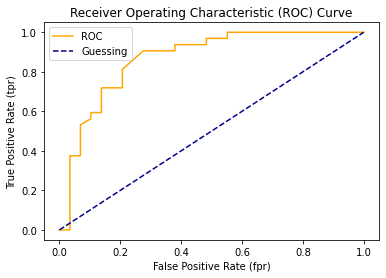

In [76]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the False Positive Rate (fpr)
    and True Positive Rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #Plot line with no redictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

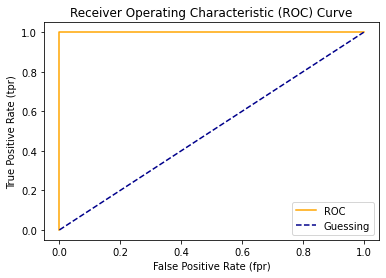

In [78]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [79]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick wy to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused.

In [80]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [81]:
# Visualize confusion matrix using pd.crosstab

pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


#### How to install a conda package inot the current environment from Jupyter notebook 

In [82]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



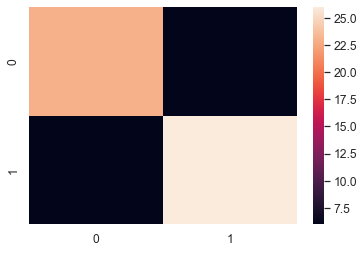

In [83]:
# Make our confusion matrix more visual using seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.1)

# Create a confusion matrix 
conf_map = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_map);

### Creating a Confusion Matrix using scikit learn
To use the new methods of creating a confusion matrix with Scikit-learn

In [84]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: done

# All requested packages already installed.



In [85]:
import sklearn
sklearn.__version__

'1.0.1'

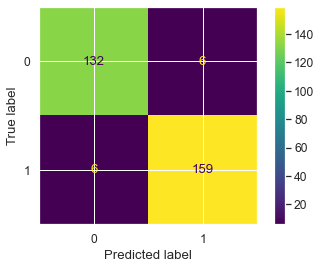

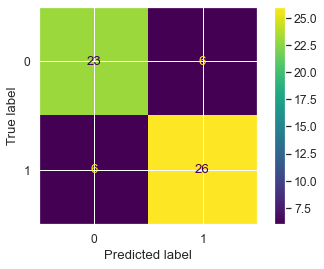

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

### Classification Report 

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2.3 Finally using the `scoring` parameter

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
np.random.seed(42)

# Crossvalidation accuracy
cv_acc = cross_val_score(clf, X , y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## Using different evaluation metrics using sklearn functions
The 3rd way to evaluate scikit-learn machine learning models/estimators is by using the `sklearn.metrics` module

In [111]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
np.random.seed(42)

y_preds = clf.predict(X_test)
# Accuracy Score
print(f'The Accuracy score is : {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'The f1 score is : {f1_score(y_test, y_preds)*100:.2f}%')
print(f'The R2 score is : {r2_score(y_test, y_preds)*100:.2f}%')
print(f'The Precision score is : {precision_score(y_test, y_preds)*100:.2f}%')
print(f'The Recall score is : {recall_score(y_test, y_preds)*100:.2f}%')

The Accuracy score is : 85.25%
The f1 score is : 86.15%
The R2 score is : 40.84%
The Precision score is : 84.85%
The Recall score is : 87.50%


#### More Evaluation metrics

In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

y_preds = model.predict(X_test)

In [115]:
# R2 Score
print(f'The r2 score is : {r2_score(y_test, y_preds)}')

# Mean Absolute Error
print(f'The MAE is : {mean_absolute_error(y_test, y_preds)}')

# Mean Squared Error
print(f'The MSE is : {mean_squared_error(y_test, y_preds)}')

The r2 score is : 0.8066196804802649
The MAE is : 0.3265721842781009
The MSE is : 0.2534073069137548


## 5. Improving a model 

First Predictions = baseline predictions
First model = baseline model

**From a data perspective:**
* Could we collect more data? (generally the more data, the better)
* Could we improve our data?

**From a model perspective:**
* Is there a better model we can use?
* Could we improve the current model?

**Parameters vs Hyperparameters**

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model that you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust Hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [116]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [117]:
# Get the hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}